In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("data/online_retail_II_sheet1.csv")

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### Delete all returned orders

In [5]:
mask = df['Invoice'].astype(str).str.startswith('C') | (df['Quantity'] <= 0)

df = df.drop(df[mask].index)

df.reset_index(drop=True, inplace=True)

print(df.shape)  

(513134, 8)


In [6]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
513129,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
513130,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
513131,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
513132,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513134 entries, 0 to 513133
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      513134 non-null  object 
 1   StockCode    513134 non-null  object 
 2   Description  512033 non-null  object 
 3   Quantity     513134 non-null  int64  
 4   InvoiceDate  513134 non-null  object 
 5   Price        513134 non-null  float64
 6   Customer ID  407695 non-null  float64
 7   Country      513134 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.3+ MB


In [8]:
# تعداد کل مقادیر NaN در کل دیتافریم
total_nans = df.isna().sum().sum()
print(f"Total NaN values: {total_nans}")

# تعداد سطرهایی که حداقل یک NaN دارند
rows_with_nans = df.isna().any(axis=1).sum()
print(f"Rows with at least one NaN: {rows_with_nans}")

# تعداد NaN به تفکیک ستون
nans_per_column = df.isna().sum()
print("\nNaNs per column:")
print(nans_per_column)

Total NaN values: 106540
Rows with at least one NaN: 105439

NaNs per column:
Invoice             0
StockCode           0
Description      1101
Quantity            0
InvoiceDate         0
Price               0
Customer ID    105439
Country             0
dtype: int64


In [9]:
print(f"Rows before: {len(df)}")

df = df.dropna(how='any')

df.reset_index(drop=True, inplace=True)

print(f"Rows after: {len(df)}")

Rows before: 513134
Rows after: 407695


In [10]:
df = df.copy()

df['Customer ID'] = df['Customer ID'].astype(str)
print(df['Customer ID'].dtype)

object


In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

In [13]:
unique_counts = df.nunique()

print(unique_counts)

Invoice        19215
StockCode       4017
Description     4444
Quantity         343
InvoiceDate    18010
Price            449
Customer ID     4314
Country           37
dtype: int64


In [14]:
df[['Quantity', 'Price']].describe()

,Quantity,Price
count,407695.000000,407695.000000
mean,13.586686,3.294188
std,96.842229,34.756655
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,19152.000000,10953.500000


In [15]:
def iqr_outlier_stats(df, columns):
    results = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # مرزهای پایین و بالا
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # ماسک اوت‌لایرها
        mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_count = mask_outliers.sum()
        total_count = df.shape[0]
        outlier_percent = (outlier_count / total_count) * 100

        results[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_count': outlier_count,
            'outlier_percent': outlier_percent
        }

    return pd.DataFrame(results).T

# اجرای تابع روی ستون‌های Quantity و Price
stats_df = iqr_outlier_stats(df, ['Quantity', 'Price'])
print(stats_df)

            Q1     Q3   IQR  lower_bound  upper_bound  outlier_count  \
Quantity  2.00  12.00  10.0        -13.0         27.0        26338.0   
Price     1.25   3.75   2.5         -2.5          7.5        32989.0   

          outlier_percent  
Quantity         6.460221  
Price            8.091588  


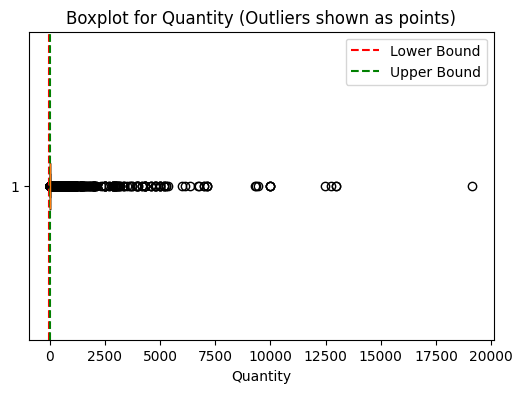

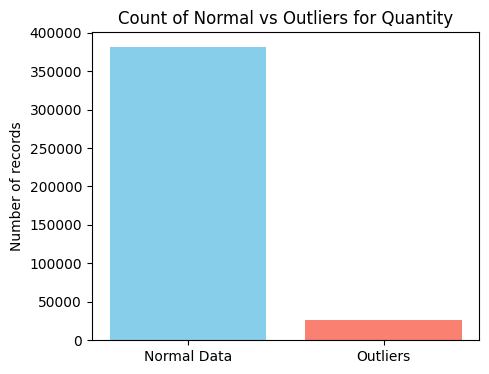

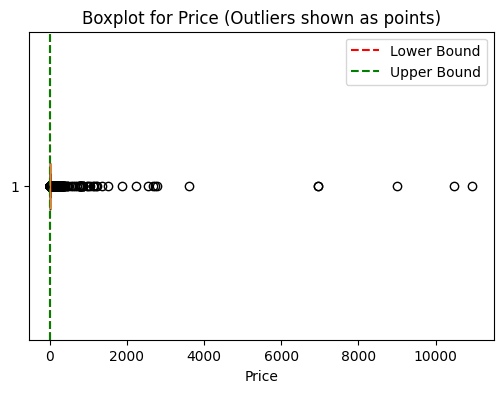

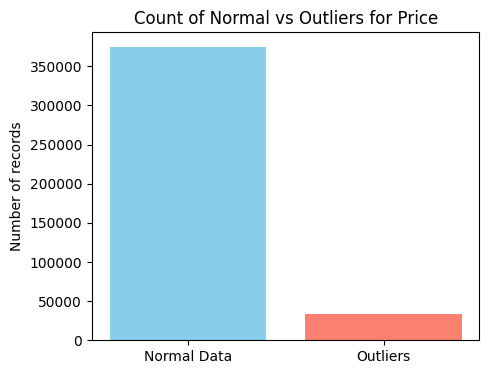

     Column    Q1     Q3   IQR  Lower Bound  Upper Bound  Outlier Count  \
0  Quantity  2.00  12.00  10.0        -13.0         27.0          26338   
1     Price  1.25   3.75   2.5         -2.5          7.5          32989   

   Outlier %  
0   6.460221  
1   8.091588  


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_outliers_iqr(df, columns):
    stats = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_count = mask_outliers.sum()
        total_count = df.shape[0]
        outlier_percent = (outlier_count / total_count) * 100
        
        stats.append({
            'Column': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': outlier_count,
            'Outlier %': outlier_percent
        })
        
        # 📊 Boxplot برای ستون
        plt.figure(figsize=(6,4))
        plt.boxplot(df[col], vert=False)
        plt.title(f'Boxplot for {col} (Outliers shown as points)')
        plt.xlabel(col)
        plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
        plt.legend()
        plt.show()
        
        # 📊 Bar chart تعداد اوت‌لایر در برابر داده‌های نرمال
        plt.figure(figsize=(5,4))
        plt.bar(['Normal Data', 'Outliers'], [total_count - outlier_count, outlier_count],
                color=['skyblue', 'salmon'])
        plt.title(f'Count of Normal vs Outliers for {col}')
        plt.ylabel("Number of records")
        plt.show()
    
    return pd.DataFrame(stats)

# اجرای تابع
stats_df = analyze_outliers_iqr(df, ['Quantity', 'Price'])
print(stats_df)


In [17]:
# پیدا کردن ردیف‌هایی که StockCode فقط شامل حروف، فاصله یا "-" باشد
mask_letters_only = df["StockCode"].astype(str).str.contains(r"^[a-zA-Z'\-\s]{1,40}$", na=False)

# لیست یکتا از این کدها
letters_only_codes = df.loc[mask_letters_only, "StockCode"].unique().tolist()

# شمارش هر کد
count_letters_only = df.loc[mask_letters_only].groupby("StockCode").size().reset_index(name="count")
print("📌 Only letters codes:\n", count_letters_only)


📌 Only letters codes:
       StockCode  count
0        ADJUST     32
1  BANK CHARGES     20
2             D      5
3             M    426
4          PADS     14
5          POST    738


In [18]:
df = df.loc[~mask_letters_only].copy()
print(f"Rows after removing letters-only codes: {df.shape[0]}")

Rows after removing letters-only codes: 406460


In [19]:
# پیدا کردن ردیف‌هایی با حداقل ۳ حرف انگلیسی پشت سرهم
mask_three_letters = df["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}", na=False)

# لیست یکتا از این کدها
three_letters_codes = df.loc[mask_three_letters, "StockCode"].unique().tolist()

# شمارش آنها
count_three_letters = df.loc[mask_three_letters].groupby("StockCode").size().reset_index(name="count")
print("📌 Codes with 3+ consecutive letters:\n", count_three_letters)


📌 Codes with 3+ consecutive letters:
   StockCode  count
0   ADJUST2      3
1   TEST001     11
2   TEST002      1


In [20]:
df = df.loc[~mask_three_letters].copy()
print(f"Rows after removing 3+ letter codes: {df.shape[0]}")


Rows after removing 3+ letter codes: 406445


In [21]:
removed_summary = pd.concat([count_letters_only, count_three_letters], ignore_index=True)
removed_summary = removed_summary.sort_values(by="count", ascending=False).reset_index(drop=True)

print("📌 Summary of removed StockCodes:\n", removed_summary)
print(f"Final remaining rows in dataset: {df.shape[0]}")


📌 Summary of removed StockCodes:
       StockCode  count
0          POST    738
1             M    426
2        ADJUST     32
3  BANK CHARGES     20
4          PADS     14
5       TEST001     11
6             D      5
7       ADJUST2      3
8       TEST002      1
Final remaining rows in dataset: 406445


In [22]:
# تعداد رکوردها قبل از حذف تکراری‌ها
print(f"📊 Rows before removing duplicates: {df.shape[0]}")

# حذف سطرهای تکراری بر اساس همه ستون‌ها
df = df.drop_duplicates()

# تعداد رکوردها بعد از حذف
print(f"✅ Rows after removing duplicates: {df.shape[0]}")


📊 Rows before removing duplicates: 406445
✅ Rows after removing duplicates: 399702


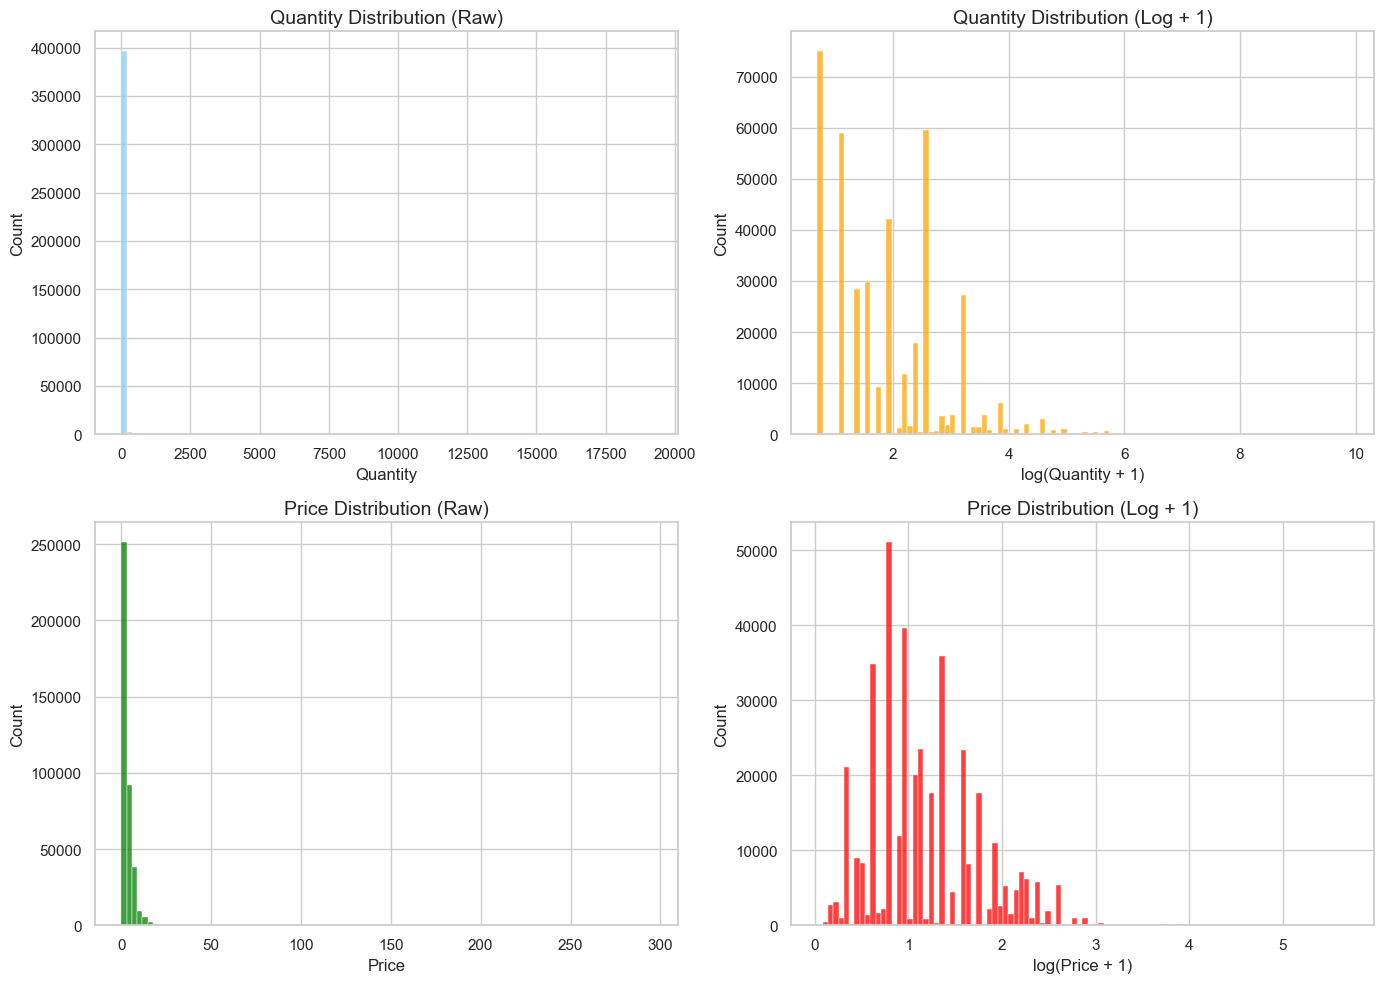

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# تنظیم سبک گراف‌ها
sns.set(style="whitegrid")

# شکل کلی و اندازه
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# -----------------------------
# Histogram for Quantity (raw)
sns.histplot(df["Quantity"], bins=100, kde=False, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Quantity Distribution (Raw)", fontsize=14)
axes[0, 0].set_xlabel("Quantity")
axes[0, 0].set_ylabel("Count")

# Histogram for Quantity (log-transformed, positive only)
sns.histplot(np.log1p(df.loc[df["Quantity"] > 0, "Quantity"]), 
             bins=100, kde=False, ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Quantity Distribution (Log + 1)", fontsize=14)
axes[0, 1].set_xlabel("log(Quantity + 1)")
axes[0, 1].set_ylabel("Count")

# -----------------------------
# Histogram for Price (raw)
sns.histplot(df["Price"], bins=100, kde=False, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Price Distribution (Raw)", fontsize=14)
axes[1, 0].set_xlabel("Price")
axes[1, 0].set_ylabel("Count")

# Histogram for Price (log-transformed, positive only)
sns.histplot(np.log1p(df.loc[df["Price"] > 0, "Price"]), 
             bins=100, kde=False, ax=axes[1, 1], color="red")
axes[1, 1].set_title("Price Distribution (Log + 1)", fontsize=14)
axes[1, 1].set_xlabel("log(Price + 1)")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [24]:
df["Revenue"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [25]:
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

print("Dataset covers from:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print("Reference date for recency calculation:", reference_date)

Dataset covers from: 2009-12-01 07:45:00 to 2010-12-09 20:01:00
Reference date for recency calculation: 2010-12-10 20:01:00


In [26]:
rfm = df.groupby("Customer ID").agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'Invoice' : 'nunique',
    'Revenue' : 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Revenue': 'Monetary',
}, inplace=True)

rfm = rfm.reset_index()

rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,165,2,169.36
1,12347.0,3,2,1323.32
2,12348.0,74,1,221.16
3,12349.0,43,2,2221.14
4,12351.0,11,1,300.93


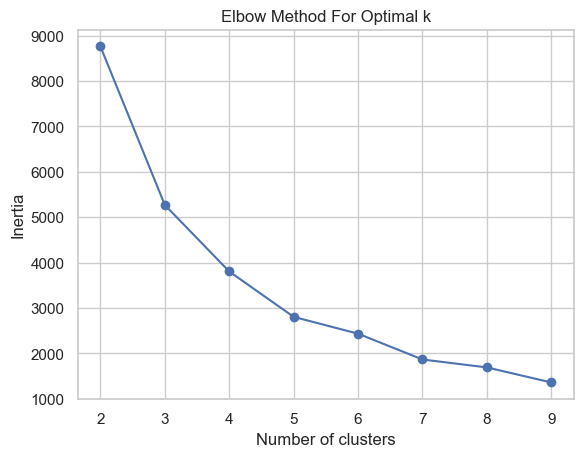

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features for clustering (exclude Customer ID)
X = rfm.drop(columns=['Customer ID'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal k using the elbow method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [28]:
# Apply the K-Means model and assign clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

In [29]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, rfm['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.6160512285997183


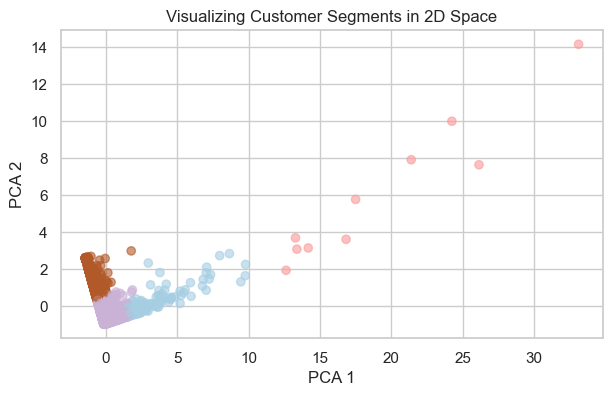

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=rfm['Cluster'], cmap='Paired', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualizing Customer Segments in 2D Space')
plt.show()

In [31]:
numeric_cols = ['Recency', 'Frequency', 'Monetary']

cluster_summary = rfm.groupby('Cluster')[numeric_cols].mean()
print("Cluster Summary: \n",cluster_summary)

Cluster Summary: 
             Recency   Frequency       Monetary
Cluster                                       
0         15.248175   27.043796   15321.108394
1          4.500000  113.400000  132708.575000
2         43.891353    3.997107    1485.294063
3        242.658560    1.648833     582.626235


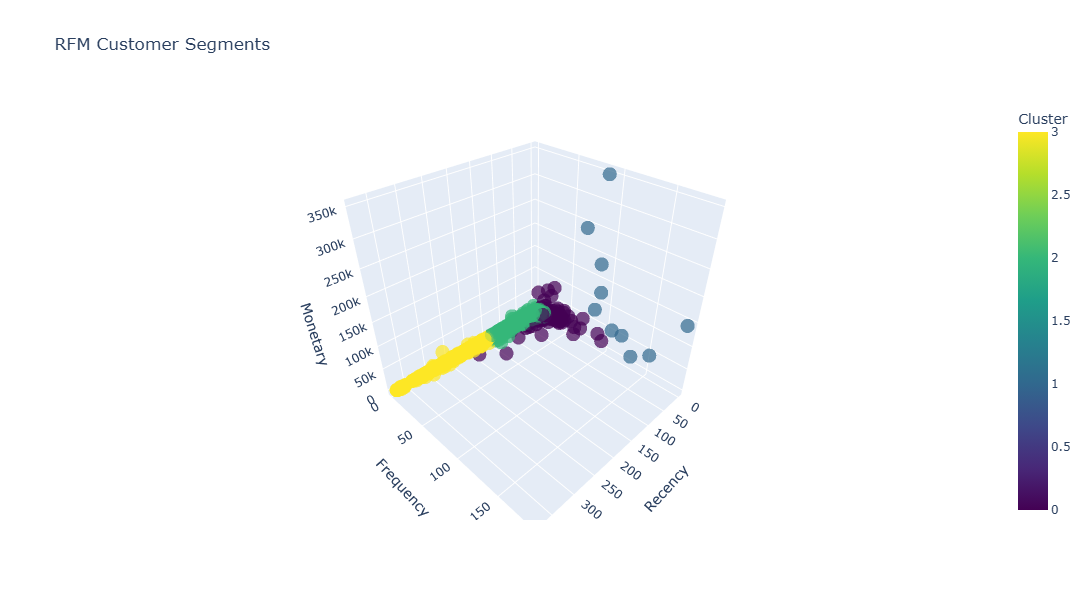

In [32]:
# 3D Scatter Plot
import plotly.express as px


fig = px.scatter_3d(
    rfm, 
    x='Recency', 
    y='Frequency', 
    z='Monetary',
    color='Cluster',
    color_continuous_scale='viridis',
    title='RFM Customer Segments',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary Value'},
    hover_name=rfm.index if 'Customer ID' not in rfm.columns else rfm['Customer ID'],
    opacity=0.7,
    size_max=10
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='Recency', # (Lower is better)
        yaxis_title='Frequency', # (Higher is better)
        zaxis_title='Monetary', # (Higher is better)
    ),
    width=700,
    height=600
)

fig.show()

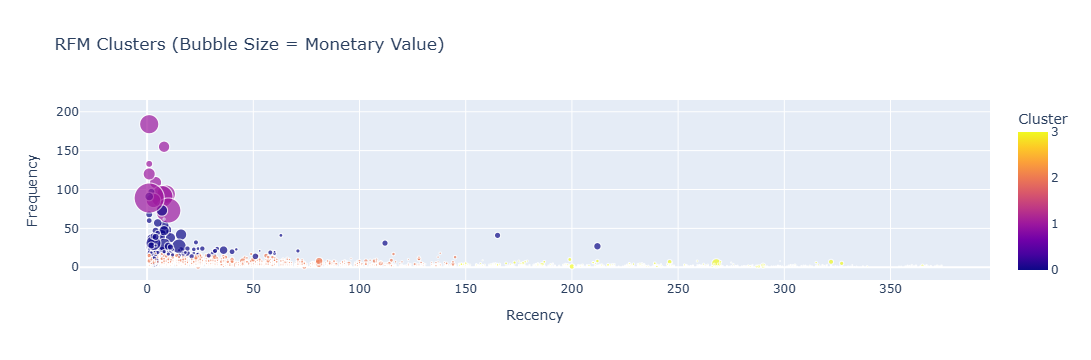

In [33]:
# Bubble chart with cluster colors (to identify bulk buyers)
fig = px.scatter(
    rfm,
    x='Recency',
    y='Frequency',
    size='Monetary',
    color='Cluster',
    hover_name=rfm.index if 'Customer ID' not in rfm.columns else rfm['Customer ID'],
    title='RFM Clusters (Bubble Size = Monetary Value)',
    size_max=30
)
fig.show()